In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from pySIVAK import pySIVAK

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

# Read data

In [3]:
inputdir = Path(r'../../data_results')

In [4]:
# Input
lock = 'Maasbracht'
scenarios = {
    'SLMSBR KBN 0 - Base, Area': 'REF',
    'SLMSBR KBN 4 - R 40 80 30': 'R 40 80 30',
    'SLMSBR KBN 5 - R 40 80 60': 'R 40 80 60',
    'SLMSBR KBN 6 - R 40 80 90': 'R 40 80 90',
    'SLMSBR KBN 7 - R 60 80 90': 'R 60 80 90',
    'SLMSBR KBN 8 - R 80 80 90': 'R 80 80 90',
    'SLMSBR KBN 9 - R 80 80 110': 'R 80 80 110'
            }

In [5]:
S = {}

for scenario, name in scenarios.items():
    summary_file =       inputdir / lock / 'KPI LockChambers Summary' / f'KPI_LockChambers_Summary_Avg ({scenario}).xlsx'
    ships_file =         inputdir / lock / 'Log Generated Ships' / f'Log Generated Ships ({scenario}).xlsx'
    levelings_file =     inputdir / lock / 'Log Locks Leveling' / f'Log Locks Leveling ({scenario}).xlsx'
    transit_times_file = inputdir / lock / 'Log Locks Transit Times' / f'Log Locks Transit Times ({scenario}).xlsx'

    S[name] = pySIVAK(ships_file, levelings_file, transit_times_file, summary_file)
    S[name].name = name


# Data analyses

In [6]:
scenario = 'REF'

In [7]:
outputdir = Path('Simulation_results') / lock / scenario
outputdir.mkdir(exist_ok=True)

In [8]:
S[scenario].transit_times.head().T

Replication Id                                                      1  \
Ship                                                         Ship.255   
Time                                              2014-01-01 04:26:46   
Lock                                                 Sluis Maasbracht   
Chamber                                                      Westkolk   
Direction                         Sluis Maasbracht - Sluishoofd Noord   
Lock Leveling ID                                                    1   
Leveling ID                                                         1   
Waited for water level                                          False   
Waiting time water level (hours)                                    0   
Waiting time (hours)                                           0.0325   
Demurrage time (hours)                                              0   
Total waiting time (hours)                                     0.0325   
Leveling time (hours)                                          0.2014   
Passage time (hours)                                           0.2339   
Time_shiplog                                      01-01-2014 03:56:52   
Fleet                                                      Noordgaand   
Class                                 M4 (Dortmund-Emskan) (CEMT III)   
Loaded                                                           True   
Load Factor                                                      0.91   
Certificate                                                     False   
Nr of Cones                                                         0   
DWT                                                           1061.94   
Width (m)                                                        8.18   
LOA (m)                                                         68.45   
Depth Loaded (m)                                                 2.52   
Depth Unloaded (m)                                               0.44   
Depth Actual (m)                                                 2.33   
Height Unloaded (m)                                              5.81   
Height Actual (m)                                                4.37   
Ship Type                                                         NaN   
Recreational                                                    False   
Min Speed (km/h)                                                   12   
Max Speed (km/h)                                                   17   
Min Speed Loaded (km/h)                                             8   
Max Speed Loaded (km/h)                                            15   
UKC (m)                                                           0.3   
Height Margin (m)                                                 0.1   
Wind Factor                                                      0.08   
Wind Factor Loaded                                               0.02   
Arrival Pattern                                                   NaN   
Reservation                                                     False   
Announced                                                       False   
Announcement Time (min)                                             0   

Replication Id                                                        \
Ship                                                        Ship.395   
Time                                             2014-01-01 05:59:11   
Lock                                                Sluis Maasbracht   
Chamber                                                     Westkolk   
Direction                         Sluis Maasbracht - Sluishoofd Zuid   
Lock Leveling ID                                                   4   
Leveling ID                                                        2   
Waited for water level                                         False   
Waiting time water level (hours)                                   0   
Waiting time (hours)                                          0.077

In [9]:
S[scenario].levelings.head().T

Replication Id                                 1                       \
Lock Leveling ID                               1                    4   
Lock                            Sluis Maasbracht     Sluis Maasbracht   
Lock Chamber                            Westkolk             Westkolk   
Leveling ID                                    1                    2   
Side                                           1                    2   
Nb of Ships                                    1                    1   
Utilization open side (%)                  24.63                55.46   
Utilization closed side (%)                    0                    0   
Waterloss (m3)                                 0              26923.2   
Total Duration (hours)                    0.2339               0.2794   
Start Sailing In (hour)                   4.2122               5.7069   
Start Doors Closing          2014-01-01 04:14:41  2014-01-01 05:47:05   
Start Leveling               2014-01-01 04:16:11  2014-01-01 05:48:35   
Start Doors Opening          2014-01-01 04:23:11  2014-01-01 05:55:35   
Start Sailing Out            2014-01-01 04:24:41  2014-01-01 05:57:05   
End Sailing Out              2014-01-01 04:26:46  2014-01-01 05:59:11   

Replication Id                                                         \
Lock Leveling ID                               2                    6   
Lock                            Sluis Maasbracht     Sluis Maasbracht   
Lock Chamber                          Middenkolk           Middenkolk   
Leveling ID                                    1                    2   
Side                                           1                    2   
Nb of Ships                                    0                    1   
Utilization open side (%)                      0                32.14   
Utilization closed side (%)                32.14                    0   
Waterloss (m3)                                 0              26923.2   
Total Duration (hours)                     6.013               0.2703   
Start Sailing In (hour)                    0.025                6.038   
Start Doors Closing          2014-01-01 05:52:17  2014-01-01 06:06:32   
Start Leveling               2014-01-01 05:53:47  2014-01-01 06:08:02   
Start Doors Opening          2014-01-01 06:00:47  2014-01-01 06:15:02   
Start Sailing Out            2014-01-01 06:02:17  2014-01-01 06:16:32   
End Sailing Out              2014-01-01 06:02:17  2014-01-01 06:18:30   

Replication Id                                    
Lock Leveling ID                               7  
Lock                            Sluis Maasbracht  
Lock Chamber                          Middenkolk  
Leveling ID                                    3  
Side                                           1  
Nb of Ships                                    0  
Utilization open side (%)                      0  
Utilization closed side (%)                24.91  
Waterloss (m3)                                 0  
Total Duration (hours)                    0.1667  
Start Sailing In (hour)                   6.3083  
Start Doors Closing          2014-01-01 06:18:30  
Start Leveling               2014-01-01 06:20:00  
Start Doors Opening          2014-01-01 06:27:00  
Start Sailing Out            2014-01-01 06:28:30  
End Sailing Out              2014-01-01 06:28:30

In [10]:
S[scenario].summary

,Lock,Amount of ships,Amount of levelings,Amount of empty levelings,Avg passage time (minutes),Avg waiting time (minutes),Avg Utilization (%)
Chamber,,,,,,,
Middenkolk,Sluis Maasbracht,237,239,48,18.78,6.66,21.92
Oostkolk,Sluis Maasbracht,119,103,9,17.87,5.46,19.89
Westkolk,Sluis Maasbracht,239,240,44,18.45,6.33,22.99


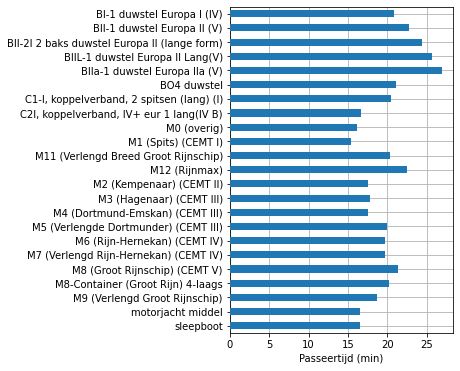

In [11]:
# Difference in ship type
plotdata = S[scenario].transit_times.groupby('Class')['Passage time (hours)'].mean() * 60
plotdata.plot.barh(figsize=(4, 6), zorder=3)
plt.xlabel('Passeertijd (min)')
plt.ylabel('')
plt.grid()
plt.gca().invert_yaxis()

plt.savefig(    outputdir / 'Passeertijd_scheepstype.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Passeertijd_scheepstype.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Passeertijd_scheepstype.csv')

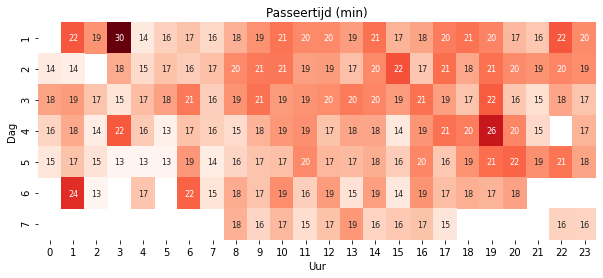

In [23]:
# Difference in weekday
plotdata = S[scenario].passage_time_per_hour_per_day()
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Passeer tijd (min)'}, cmap='Reds', annot=True, fmt='.0f', annot_kws={'size': 8})
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Passeertijd (min)')

plt.savefig(    outputdir / 'Passeertijd_dag_uur.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Passeertijd_dag_uur.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Passeertijd_dag_uur.csv')

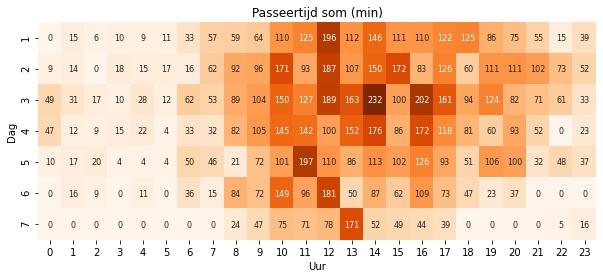

In [13]:
plotdata = S[scenario].passage_time_per_hour_per_day_per_ship_sum().fillna(0).sum(axis=1).unstack().fillna(0)
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Passeer tijd (min)'}, cmap='Oranges', annot=True, fmt='.0f', annot_kws={'size': 8})
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Passeertijd som (min)')

plt.savefig(    outputdir / 'Passeertijd_dag_uur_som.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Passeertijd_dag_uur_som.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Passeertijd_dag_uur_som.csv')

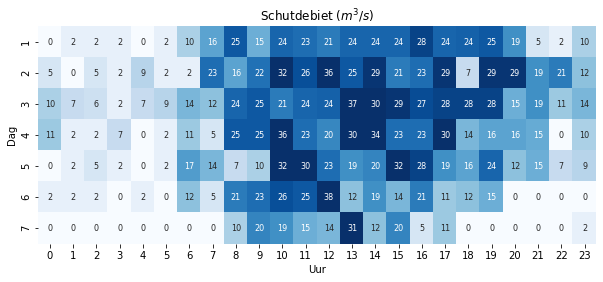

In [14]:
# Difference in weekday
plotdata = S[scenario].waterloss_per_hour_per_day()
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Afvoer ($m^3/s$)'}, cmap='Blues', annot=True, fmt='.0f', annot_kws={'size': 8}, vmin=0, vmax=30)
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Schutdebiet ($m^3/s$)')

plt.savefig(    outputdir / 'Schutdebiet.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Schutdebiet.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Schutdebiet.csv')

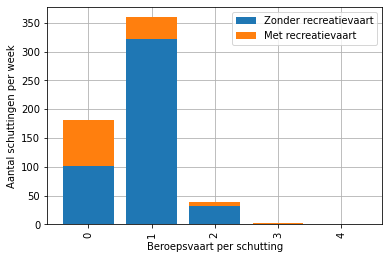

In [15]:
t = S[scenario].ships_per_leveling()

plotdata = pd.concat({
    'Zonder recreatievaart': t.iloc[:, t.columns < 1].sum(axis=1),
    'Met recreatievaart': t.iloc[:, t.columns >= 1].sum(axis=1),
}, axis=1)

plotdata = plotdata.reindex(np.arange(0, 5, 1))
plotdata.plot.bar(stacked=True, width=0.8, zorder=3)
plt.grid()
plt.xlabel('Beroepsvaart per schutting')
plt.ylabel('Aantal schuttingen per week')

plt.savefig(    outputdir / 'Schuttingen_beroepsvaart.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Schuttingen_beroepsvaart.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Schuttingen_beroepsvaart.csv')

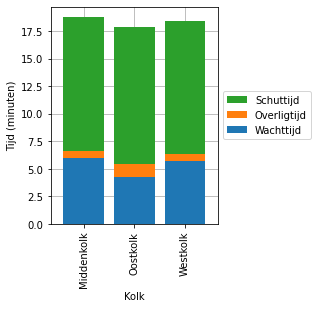

In [16]:
plotdata = (S[scenario].transit_times.groupby('Chamber')[['Waiting time (hours)',
       'Demurrage time (hours)',
       'Leveling time (hours)', ]].mean() *60)

plotdata.rename(columns={
    'Waiting time (hours)': 'Wachttijd',
    'Demurrage time (hours)': 'Overligtijd',
    'Leveling time (hours)': 'Schuttijd'
}, inplace=True)

plotdata.plot.bar(stacked=True, figsize=(3,4), width=0.8, zorder=3)

plt.gca().legend(*map(reversed, plt.gca().get_legend_handles_labels()), loc='center left',
                         bbox_to_anchor=(1, 0.5))
plt.ylabel('Tijd (minuten)')
plt.grid()
plt.xlabel('Kolk')

plt.savefig(    outputdir / 'Passeertijd.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Passeertijd.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Passeertijd.csv')

In [20]:
plotdata = S[scenario].utilization(n_bins=5)

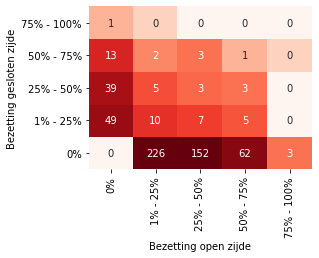

In [21]:
f, ax = plt.subplots(figsize=(4,3))
sns.heatmap(plotdata.T+ 1e-10, annot=True, fmt='.0f', cbar=False, vmax=100, vmin=0, norm=LogNorm(vmin=0.1, vmax=100), cmap='Reds')
plt.xlabel('Bezetting open zijde')
plt.ylabel('Bezetting gesloten zijde')
ax.invert_yaxis()

plt.savefig(    outputdir / 'Bezetting.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Bezetting.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Bezetting.csv')

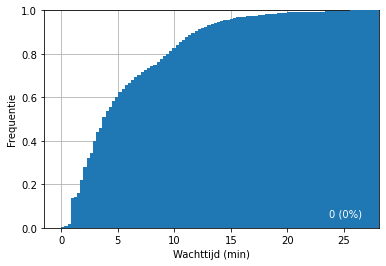

In [22]:
plotdata = S[scenario].transit_times['Waiting time (hours)']
plotdata = plotdata * 60

t_criterium = 30

plotdata.plot.hist(density=True, cumulative=True, bins=100, zorder=3)
plt.xlabel('Wachttijd (min)')
plt.axvline(t_criterium, c='k', ls=':', zorder=4)
plt.grid()
plt.ylabel('Frequentie')
plt.xlim(right=plotdata.max())
plt.ylim(0, 1)

n_above_criterium = (plotdata > t_criterium).sum() / S[scenario].replications
n_above_criterium_percentage = n_above_criterium / (plotdata.count() / S[scenario].replications)
plt.annotate(f'{n_above_criterium:.0f} ({n_above_criterium_percentage:.0%})', (0.95, 0.05), xycoords='axes fraction', ha='right', c='white')

plt.savefig(    outputdir / 'Wachttijd_verdeling.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Wachttijd_verdeling.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Wachttijd_verdeling.csv')